<a href="https://colab.research.google.com/github/tarunkalra/Breast-Cancer-Dataset-Wisonsin-Report/blob/master/MLDA_Project_19cs06015_19cs06001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns
import time
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

Saving data.csv to data.csv


In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop('id',axis=1,inplace=True) #dropping the 'id' column
data.drop('Unnamed: 32',axis=1,inplace=True)
print("Row, Col", data.shape)# (row,col)

Row, Col (569, 31)


In [6]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


diagnosis
0    357
1    212
dtype: int64


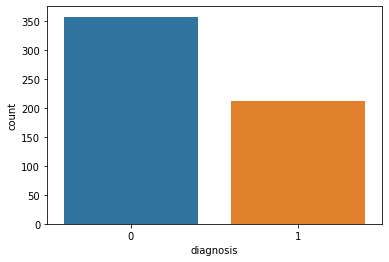

In [8]:
print(data.groupby('diagnosis').size())
sns.countplot(data['diagnosis'],label="Count")
plt.show()

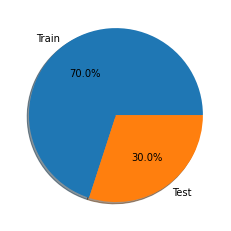

Train set (398, 31)
Test set (171, 31)


In [9]:
traindf, testdf = train_test_split(data, test_size = 0.3)
labels = 'Train', 'Test'
plt.pie([70, 30], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)

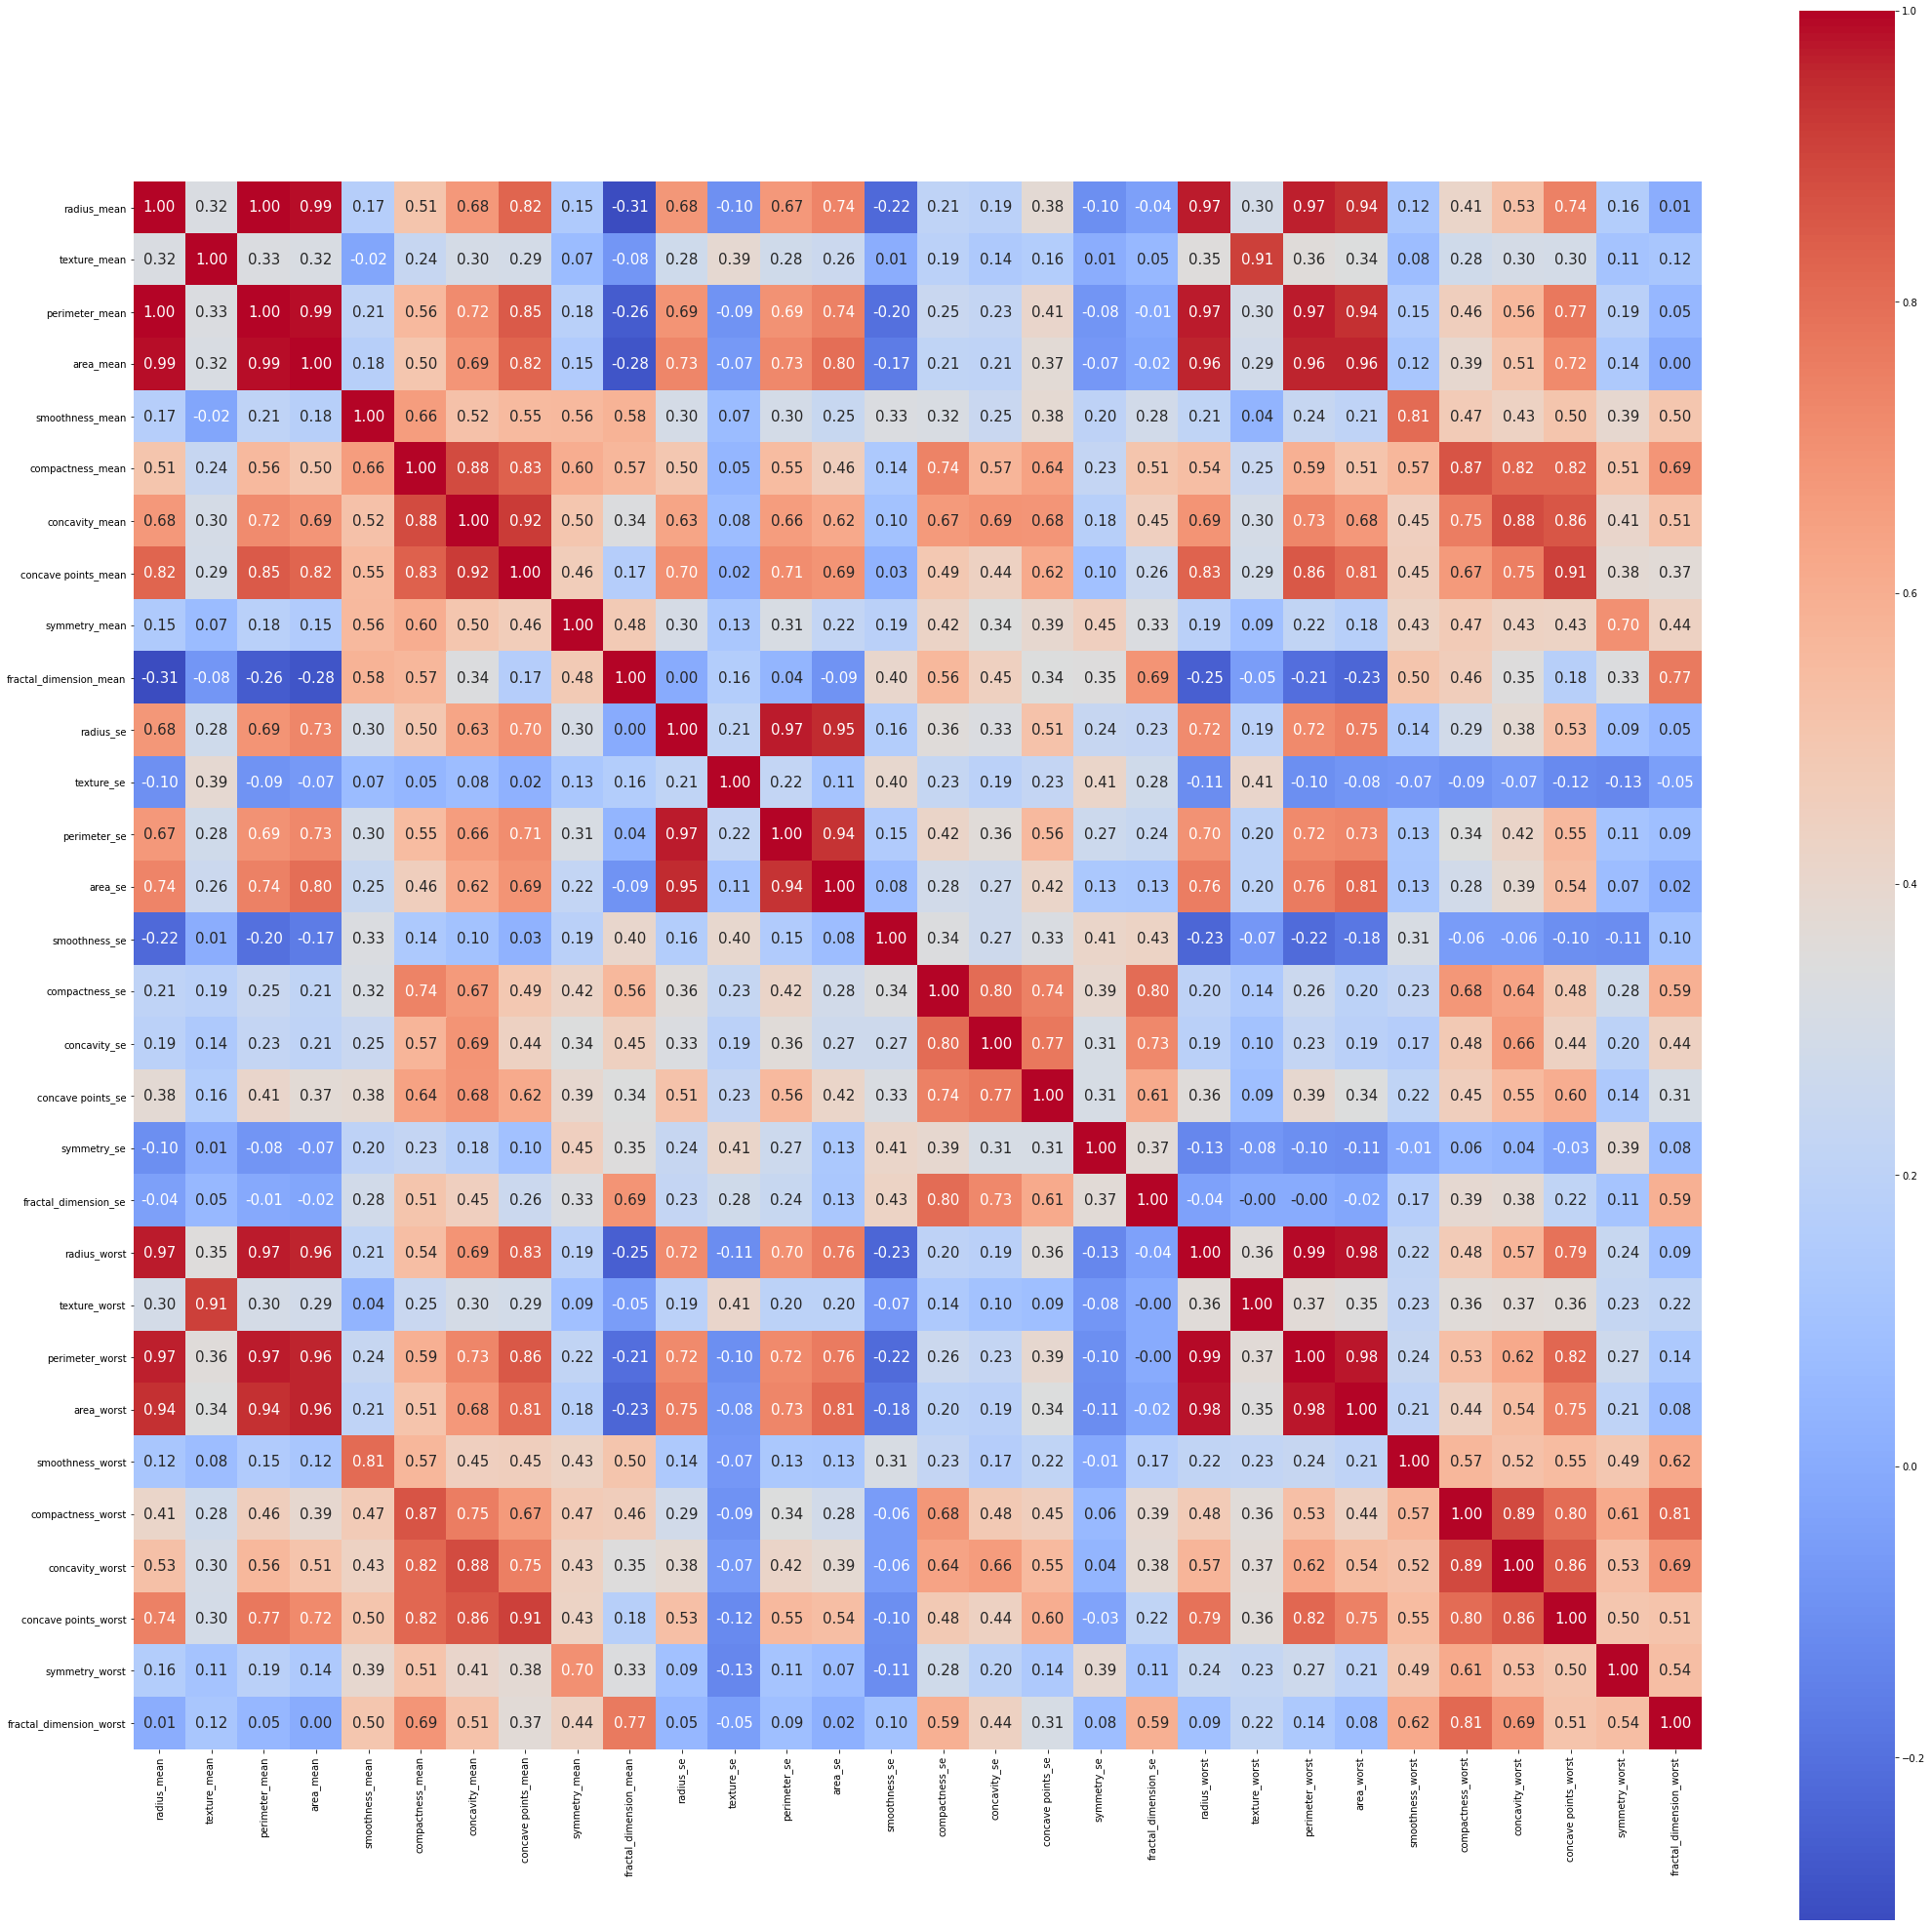

In [10]:
features_mean= list(data.columns[1:31])
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(36,36))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 
plt.show()

In [11]:
#Generic function for making a classification model and accessing the performance. 
features_mean= list(data.columns[1:])
y = data['diagnosis'].values
X = data.loc[:,features_mean]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
accuracy_all = []
cvs_all = []

In [12]:
from sklearn.metrics import accuracy_score
start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 95.74%
Cross validation score: 96.66% (+/- 3.98%)
Execution time: 0.1123 seconds 



In [13]:
neighbors = [] 
cv_scores = [] 
  
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 

for k in range(1, 21, 2): 
    neighbors.append(k) 
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train) 
    scores = cross_val_score( 
        knn, X, y, cv = 10, scoring = 'accuracy')
    end=time.time()
    print("Execution time : {0:.5} seconds".format(end-start))
    cv_scores.append(scores.mean()) 
    print("KNN Score : {0:.2%}".format(knn.score(X_test, y_test)))
    print("Cross validation score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores), np.std(scores)*2))
#print("Mean Score : {0:.2%}".format(scores.mean()))



Execution time : 0.095874 seconds
KNN Score : 94.15%
Cross validation score: 95.08% (+/- 4.93%)

Execution time : 0.081249 seconds
KNN Score : 95.74%
Cross validation score: 96.48% (+/- 4.48%)

Execution time : 0.057115 seconds
KNN Score : 95.74%
Cross validation score: 96.66% (+/- 3.98%)

Execution time : 0.061052 seconds
KNN Score : 96.28%
Cross validation score: 96.84% (+/- 3.77%)

Execution time : 0.060574 seconds
KNN Score : 96.81%
Cross validation score: 96.48% (+/- 5.20%)

Execution time : 0.058683 seconds
KNN Score : 95.74%
Cross validation score: 96.84% (+/- 5.39%)

Execution time : 0.061629 seconds
KNN Score : 95.21%
Cross validation score: 96.66% (+/- 5.31%)

Execution time : 0.06446 seconds
KNN Score : 95.21%
Cross validation score: 96.13% (+/- 4.65%)

Execution time : 0.060581 seconds
KNN Score : 94.68%
Cross validation score: 96.31% (+/- 5.07%)

Execution time : 0.063275 seconds
KNN Score : 95.21%
Cross validation score: 95.43% (+/- 4.22%)



The optimal number of neighbors is  7 


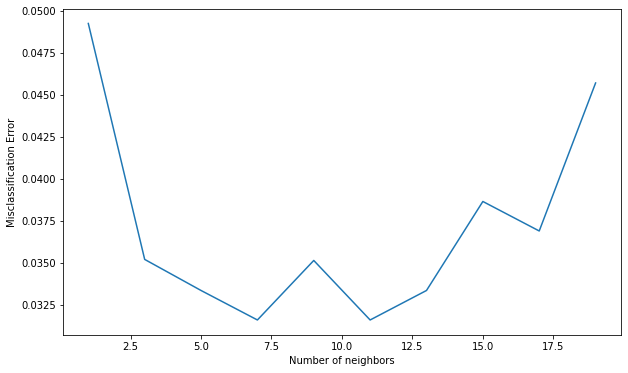

In [14]:
MSE = [1-x for x in cv_scores] 
  
# determining the best k 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
  
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

1
Execution time : 0.044283 seconds
Cross validation score: 88.23% (+/- 5.84%)

Execution time : 0.028332 seconds
Cross validation score: 88.93% (+/- 5.19%)

2
Execution time : 0.074383 seconds
Cross validation score: 89.46% (+/- 7.33%)

Execution time : 0.044028 seconds
Cross validation score: 92.10% (+/- 5.69%)

3
Execution time : 0.1 seconds
Cross validation score: 93.85% (+/- 6.70%)

Execution time : 0.058958 seconds
Cross validation score: 91.39% (+/- 7.90%)

4
Execution time : 0.11413 seconds
Cross validation score: 93.50% (+/- 7.19%)

Execution time : 0.073957 seconds
Cross validation score: 91.58% (+/- 8.12%)

5
Execution time : 0.1227 seconds
Cross validation score: 93.50% (+/- 6.47%)

Execution time : 0.085154 seconds
Cross validation score: 92.28% (+/- 7.72%)

6
Execution time : 0.11999 seconds
Cross validation score: 93.50% (+/- 3.85%)

Execution time : 0.093084 seconds
Cross validation score: 91.40% (+/- 7.42%)

7
Execution time : 0.12069 seconds
Cross validation score: 93

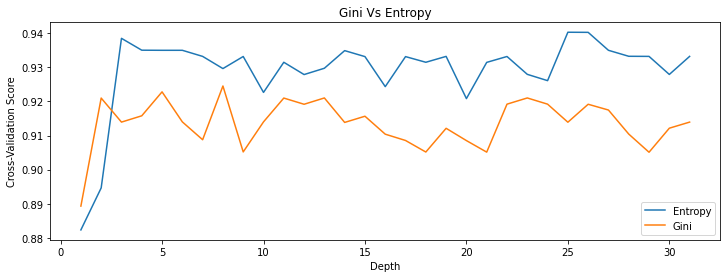

In [15]:
y_entropy = []
y_gini = []
cv_scores_decisiontree = []
cv_scores_decisiontreegini = []
max_depth_entropy = 0;
max_depth_gini = 0;
max_entro = 0;
max_gini = 0;
from graphviz import Source
from sklearn import tree
for depth in range(len(data.columns)):
    print(depth+1)
    start=time.time()
    classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth+1)
    classifier_entropy.fit(X_train, y_train)
    scores_dt = cross_val_score( 
        classifier_entropy, X, y, cv = 10, scoring = 'accuracy')
    cv_scores_decisiontree.append(scores_dt.mean())
    if max_entro<scores_dt.mean():
        max_entro = scores_dt.mean()
        max_depth_entropy = depth+1
    end=time.time()
    print("Execution time : {0:.5} seconds".format(end-start))
    print("Cross validation score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_dt), np.std(scores_dt)*2))
    start=time.time()
    classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth+1)
    classifier_gini.fit(X_train, y_train)
    scores_dtg = cross_val_score( 
        classifier_gini, X, y, cv = 10, scoring = 'accuracy')
    end=time.time()
    print("Execution time : {0:.5} seconds".format(end-start))
    print("Cross validation score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_dtg), np.std(scores_dtg)*2))
    cv_scores_decisiontreegini.append(scores_dtg.mean())
    if max_gini<scores_dtg.mean():
        max_gini = scores_dtg.mean()
        max_depth_gini = depth+1
    y_entropy.append(classifier_entropy.score(X_test, y_test)*100)
    y_gini.append(classifier_gini.score(X_test, y_test)*100)
plt.figure(figsize=(12,4))
plt.plot(range(1, len(data.columns)+1), cv_scores_decisiontree)
plt.plot(range(1, len(data.columns)+1), cv_scores_decisiontreegini)
plt.title('Gini Vs Entropy')
plt.xlabel('Depth')
plt.ylabel('Cross-Validation Score')
plt.legend(['Entropy', 'Gini'])
plt.show()

25
8


[Text(697.5, 509.625, 'X[7] <= 0.061\nentropy = 0.958\nsamples = 381\nvalue = [236, 145]'),
 Text(403.0, 441.675, 'X[20] <= 0.116\nentropy = 0.293\nsamples = 233\nvalue = [221, 12]'),
 Text(248.0, 373.725, 'X[13] <= 0.184\nentropy = 0.157\nsamples = 219\nvalue = [214, 5]'),
 Text(124.0, 305.775, 'X[21] <= 0.728\nentropy = 0.106\nsamples = 216\nvalue = [213, 3]'),
 Text(62.0, 237.825, 'entropy = 0.0\nsamples = 188\nvalue = [188, 0]'),
 Text(186.0, 237.825, 'X[23] <= -0.42\nentropy = 0.491\nsamples = 28\nvalue = [25, 3]'),
 Text(124.0, 169.875, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(248.0, 169.875, 'X[2] <= -0.235\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(186.0, 101.92500000000001, 'X[1] <= 1.919\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(124.0, 33.97500000000002, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(248.0, 33.97500000000002, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(310.0, 101.92500000000001, 'entropy = 0.0\nsamples = 4

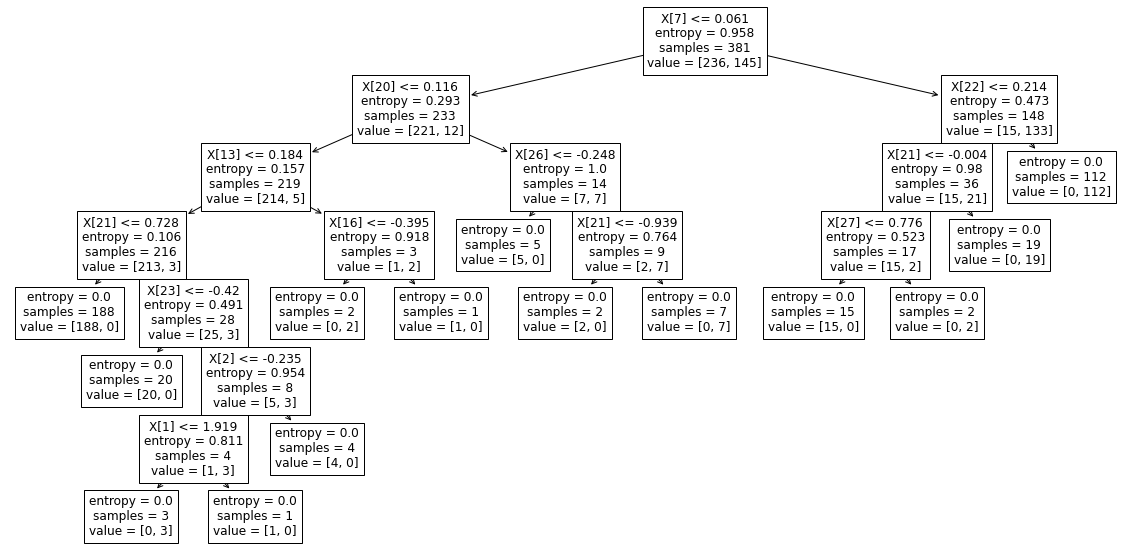

In [16]:
print(max_depth_entropy)
print(max_depth_gini)
classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_entropy)
classifier_entropy.fit(X_train, y_train)
plt.figure(figsize = (20, 10))
tree.plot_tree(classifier_entropy)

[Text(600.9230769230769, 509.625, 'X[7] <= 0.061\ngini = 0.471\nsamples = 381\nvalue = [236, 145]'),
 Text(407.7692307692307, 441.675, 'X[20] <= 0.116\ngini = 0.098\nsamples = 233\nvalue = [221, 12]'),
 Text(300.46153846153845, 373.725, 'X[10] <= 0.795\ngini = 0.045\nsamples = 219\nvalue = [214, 5]'),
 Text(214.61538461538458, 305.775, 'X[24] <= 1.985\ngini = 0.027\nsamples = 216\nvalue = [213, 3]'),
 Text(171.69230769230768, 237.825, 'X[14] <= -1.244\ngini = 0.018\nsamples = 215\nvalue = [213, 2]'),
 Text(85.84615384615384, 169.875, 'X[27] <= -0.207\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(42.92307692307692, 101.92500000000001, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(128.76923076923077, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(257.53846153846155, 169.875, 'X[21] <= 1.249\ngini = 0.009\nsamples = 211\nvalue = [210, 1]'),
 Text(214.61538461538458, 101.92500000000001, 'gini = 0.0\nsamples = 199\nvalue = [199, 0]'),
 Text(300.4615384615384

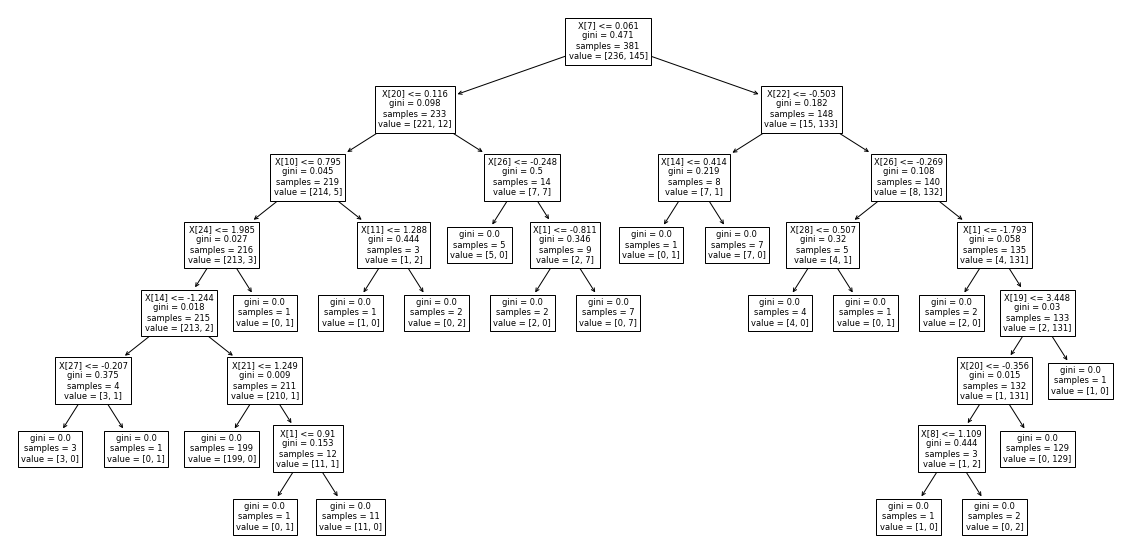

In [17]:
classifier_entropy2 = DecisionTreeClassifier(criterion='gini', max_depth=max_depth_gini)
classifier_entropy2.fit(X_train, y_train)
plt.figure(figsize = (20, 10))
tree.plot_tree(classifier_entropy2)

In [18]:
from sklearn.naive_bayes import GaussianNB
start=time.time()
NB_sk = GaussianNB()
NB_sk.fit(X_train, y_train)  
sk_pred = NB_sk.predict(X_test)
scores_gaussian = cross_val_score( 
        NB_sk, X, y, cv = 10, scoring = 'accuracy')
end=time.time()
print("Accuracy: {0:.2%}".format(accuracy_score(sk_pred, y_test)))
print("Execution time : {0:.5} seconds".format(end-start))
print("Cross validation score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_gaussian), np.std(scores_gaussian)*2))


Accuracy: 93.62%
Execution time : 0.024144 seconds
Cross validation score: 93.15% (+/- 6.54%)



In [58]:
from sklearn import linear_model
cv_scores_percep_l1 = []
cv_scores_percep_l2 = []
cv_scores_percp_iterations=[]
cv_scores_percp_eta = []
cv_scores_percp_iter = []

list_ = []
list_in_list = []
values = [0.001,0.005,0.01,0.05,0.1]
alpha_values = [0.1,0.01,0.001,0.005,0.0001]
max_iterations = [100,500,1000,5000,10000]
penalty=['l1','l2']
for value in values:
    for alpha_ in alpha_values:
        for max_iter_ in max_iterations:
            for penalty_ in penalty:
                percp=0
                percp=linear_model.Perceptron(alpha=alpha_,max_iter=max_iter_,eta0=value,penalty=penalty_,random_state=41)
                percp.fit(X_train,y_train)
                y_predic=clf.predict(X_test)
                accurac=accuracy_score(y_test,y_predic)
                scores_perceptron = cross_val_score(percp, X, y, cv = 10, scoring = 'accuracy')
                print("Eta value : {0:.2}".format(value)+"  Alpha value : {0:.2}".format(alpha_)+"  Iterations : {}".format(max_iter_))
                print("Accuracy: {0:.2%}".format(accurac))
                if penalty_=='l1' : 
                    cv_scores_percep_l1.append(scores_perceptron.mean())
                    print("Cross validation score (L1): {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_perceptron), np.std(scores_perceptron)*2))
                if penalty_=='l2' :
                    cv_scores_percep_l2.append(scores_perceptron.mean())
                    print("Cross validation score (L2): {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_perceptron), np.std(scores_perceptron)*2))
            list_.append("E: "+str(value)+" A: "+str(alpha_)+" I: "+str(max_iter_))
            list_in_list.append(list_)
            list_=[]


Eta value : 0.001  Alpha value : 0.1  Iterations : 100
Accuracy: 95.74%
Cross validation score (L1): 83.49% (+/- 21.62%)

Eta value : 0.001  Alpha value : 0.1  Iterations : 100
Accuracy: 95.74%
Cross validation score (L2): 95.08% (+/- 4.66%)

Eta value : 0.001  Alpha value : 0.1  Iterations : 500
Accuracy: 95.74%
Cross validation score (L1): 83.49% (+/- 21.62%)

Eta value : 0.001  Alpha value : 0.1  Iterations : 500
Accuracy: 95.74%
Cross validation score (L2): 95.08% (+/- 4.66%)

Eta value : 0.001  Alpha value : 0.1  Iterations : 1000
Accuracy: 95.74%
Cross validation score (L1): 83.49% (+/- 21.62%)

Eta value : 0.001  Alpha value : 0.1  Iterations : 1000
Accuracy: 95.74%
Cross validation score (L2): 95.08% (+/- 4.66%)

Eta value : 0.001  Alpha value : 0.1  Iterations : 5000
Accuracy: 95.74%
Cross validation score (L1): 83.49% (+/- 21.62%)

Eta value : 0.001  Alpha value : 0.1  Iterations : 5000
Accuracy: 95.74%
Cross validation score (L2): 95.08% (+/- 4.66%)

Eta value : 0.001  Alpha

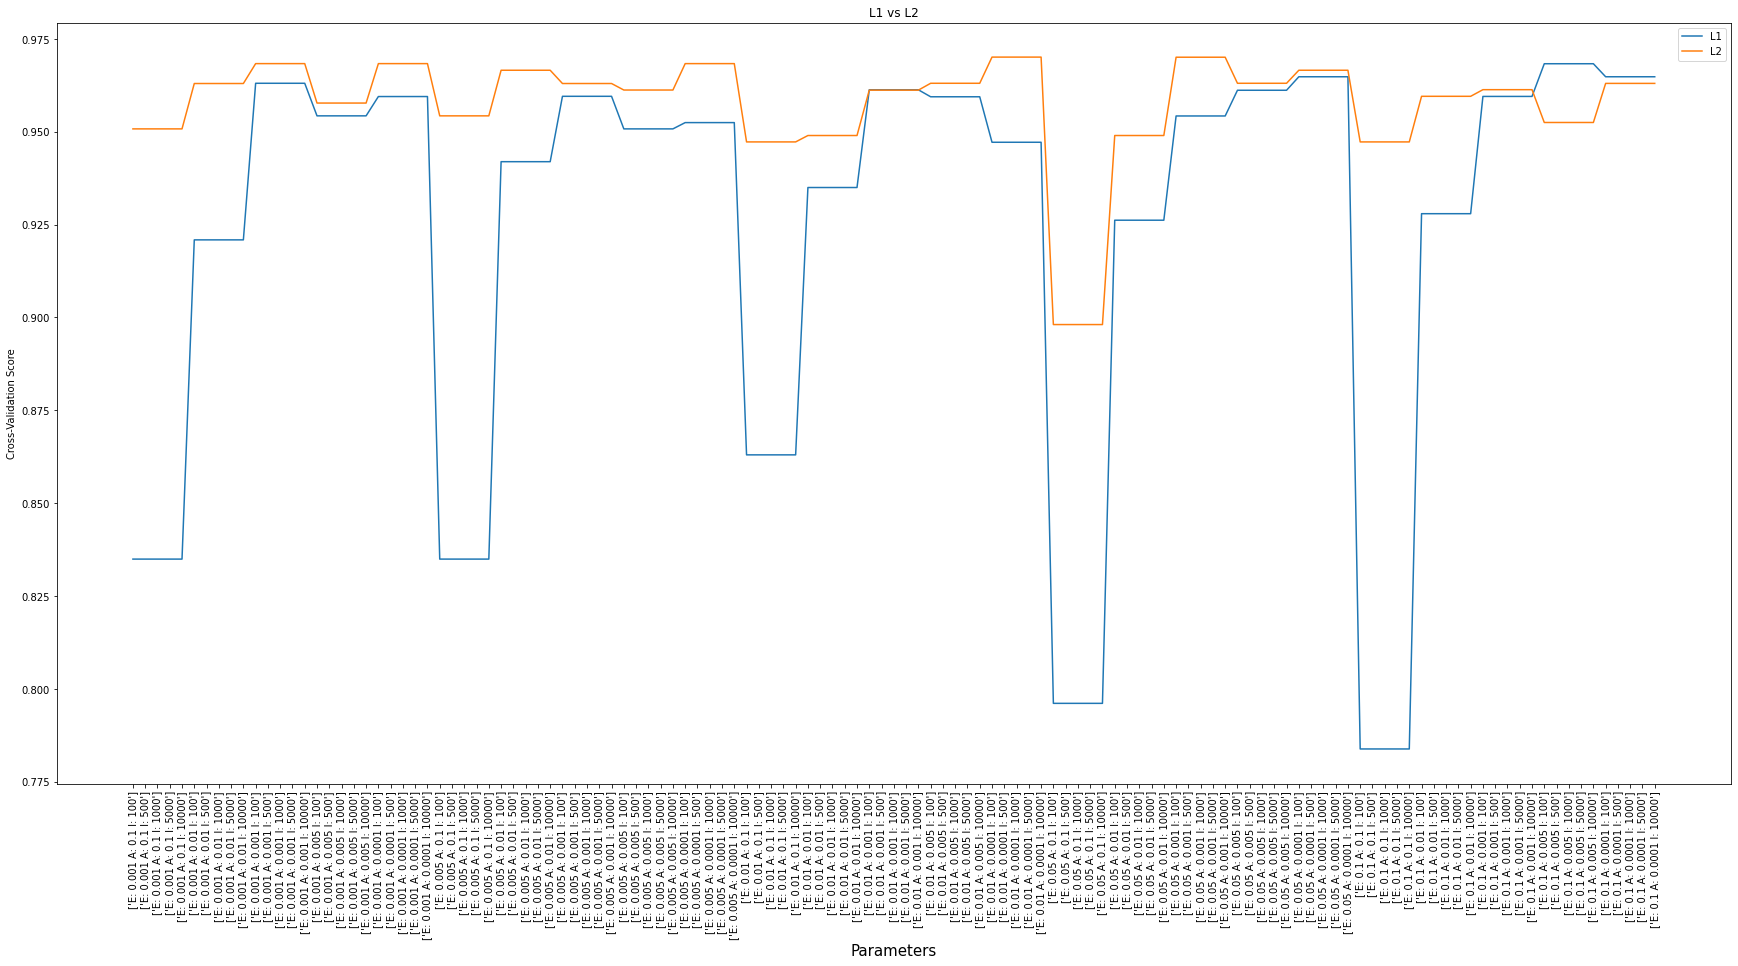

In [59]:
plt.figure(figsize=(30,14))
x=range(0, 125 )
plt.xticks(x, list_in_list,rotation=90)
plt.xlabel('Parameters',fontsize=15)
plt.plot(x, cv_scores_percep_l1)
plt.plot(x, cv_scores_percep_l2)
plt.title('L1 vs L2')

plt.ylabel('Cross-Validation Score')
plt.legend(['L1', 'L2'])
plt.show()